25.435136079788208


(array([  2.,   2.,   0.,   2.,   2.,   6.,   1.,  11.,   4.,  10.,   8.,
         42.,  76.,  82.,  86., 206., 262., 316., 380., 334., 364., 616.,
        388., 426., 370., 300., 490., 324., 640., 462., 356., 310., 330.,
        296., 288., 242., 294., 292., 292., 176., 204., 168.,  84., 116.,
        144.,  48.,  48.,  36.,  40.,  24.]),
 array([294180.29831659, 303010.98369762, 311841.66907865, 320672.35445968,
        329503.0398407 , 338333.72522173, 347164.41060276, 355995.09598379,
        364825.78136482, 373656.46674585, 382487.15212688, 391317.8375079 ,
        400148.52288893, 408979.20826996, 417809.89365099, 426640.57903202,
        435471.26441305, 444301.94979408, 453132.63517511, 461963.32055613,
        470794.00593716, 479624.69131819, 488455.37669922, 497286.06208025,
        506116.74746128, 514947.43284231, 523778.11822333, 532608.80360436,
        541439.48898539, 550270.17436642, 559100.85974745, 567931.54512848,
        576762.23050951, 585592.91589053, 594423.6

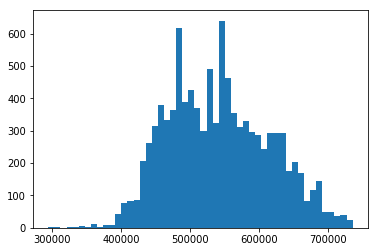

In [1]:
from math import*
import __main__
global PI
import os
import time
PI=float(acos(-1))

import random
import numpy as np
import multiprocessing as mp

import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations, permutations
import itertools

# rs_number = 123
# random.seed(rs_number)

num_layer = 4
data_size = 10**num_layer ;

datasets0 = []
x_range = [0,1,2,3,4,5,6,7,8,9]
for i in itertools.product(x_range, repeat=num_layer):
    datasets0.append(list(i))

datasets = np.reshape(datasets0,(data_size,num_layer))
# print(datasets)

def ssh(num):
#     global datasets
#     arr = np.random.randint(1, 10, size=[data_size, 8])
#     datasets = arr.tolist()
    ply_angle = datasets[num]
    
#     bas_ply=[-60, -45, -30, -15, 0, 15, 30, 45, 60, 90]
    bas_ply=[-60, -45, -30, -15, 0, 15, 30, 45, 60, 90]

    AA1=bas_ply[ply_angle[0]]
    AA2=bas_ply[ply_angle[1]]
    AA3=bas_ply[ply_angle[2]]
    AA4=bas_ply[ply_angle[3]]
#     AA5=bas_ply[ply_angle[4]]
#     AA6=bas_ply[ply_angle[5]]
#     AA7=bas_ply[ply_angle[6]]
#     AA8=bas_ply[ply_angle[7]]

    ### ply stacking sequence###
    # 8 layers
#     AAA=[AA1/180.0*PI,AA2/180.0*PI,AA3/180.0*PI,AA4/180.0*PI,AA5/180.0*PI,AA6/180.0*PI,AA7/180.0*PI,AA8/180.0*PI,AA8/180.0*PI,AA7/180.0*PI,AA6/180.0*PI,AA5/180.0*PI,AA4/180.0*PI,AA3/180.0*PI,AA2/180.0*PI,AA1/180.0*PI]
    # 4 layers
    AAA=[AA1/180.0*PI,AA2/180.0*PI,AA3/180.0*PI,AA4/180.0*PI,AA4/180.0*PI,AA3/180.0*PI,AA2/180.0*PI,AA1/180.0*PI]
    
    
    pi=3.14159265358979

    R=250.0   ##  radius##
    H=510.0   ##  Height##
    td=1.0/num_layer  #layer thickness##
    

    # 8 layers
#     TTT=[-td*8,-td*7,-td*6,-td*5,-td*4,-td*3,-td*2,-td*1,td*0,td*1,td*2,td*3,td*4,td*5,td*6,td*7,td*8]
    # 4 layers
    TTT=[-td*4,-td*3,-td*2,-td*1,td*0,td*1,td*2,td*3,td*4]

    ###material property###

    E1=123550.0  
    E2=8707.9
    G12=5695.0
    miu12=0.31946

    miu21=miu12*E2/E1
    Q11=E1/(1-miu12*miu21)
    Q12=miu21*E1/(1-miu12*miu21)
    Q22=E2/(1-miu12*miu21)
    Q66=G12

    A11=0.0
    A12=0.0
    A22=0.0
    A66=0.0

    D11=0.0
    D12=0.0
    D22=0.0
    D66=0.0

    for i in range(0,num_layer*2):
        A11=A11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A12=A12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        A22=A22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A66=A66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        D11=D11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D12=D12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0
        D22=D22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D66=D66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0

    #####bianliang########

    D= 2*R
    L= H

    #xian
    a=[[A11,A12,0],[A12,A22,0],[0,0,A66]]
    b=[[0,0,0],[0,0,0],[0,0,0]]
    d=[[D11,D12,0],[D12,D22,0],[0,0,D66]]

    alpha=PI/L
    beta=2/D

    mm=50
    nn=50
    kmm=0
    knn=0
    kmm11=0
    knn11=0
    F=[[0 for col in range(nn)] for row in range(mm)]
    Fcr=1e16

    for m in range(1,mm+1):
        for n in range(1,nn+1):
            xi11=2*a[0][0]*(m*alpha)**2+2*a[2][2]*(n*beta)**2
            xi12=2*(a[0][1]+a[2][2])*m*alpha*n*beta
            xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3-2*(b[0][1]+2*b[2][2])*m*alpha*(n*beta)**2
            xi22=2*a[1][1]*(n*beta)**2+2*a[2][2]*(m*alpha)**2
            xi23=4*a[1][1]*n*beta/D-2*b[1][1]*(n*beta)**3-2*(b[0][1]+2*b[2][2])*(m*alpha)**2*n*beta
            xi33=4*(d[0][1]+2*d[2][2])*(m*alpha*n*beta)**2+8*a[1][1]/(D**2)\
            +2*d[0][0]*(m*alpha)**4+2*d[1][1]*(n*beta)**4-8*(b[1][1]*(n*beta)**2+b[0][1]*(m*alpha)**2)/D
            xi21=xi12
            xi31=xi13
            xi32=xi23
            det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
            det2=xi11*xi22-xi21*xi12
            Nx=det1/det2/(2*((m*alpha)**2))
            F[m-1][n-1]=Nx*PI*D
            if Fcr>F[m-1][n-1]:
              Fcr=F[m-1][n-1]
              kmm=m
              knn=2*n

    for m in range(1,mm+1):
        xi11=2*a[0][0]*(m*alpha)**2
        xi12=0
        xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3
        xi22=2*a[2][2]*(m*alpha)**2
        xi23=0
        xi33=8*a[1][1]/(D**2)+2*d[0][0]*(m*alpha)**4-8*b[0][1]*(m*alpha)**2/D
        xi21=xi12
        xi31=xi13
        xi32=xi23
        det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
        det2=xi11*xi22-xi21*xi12
        Nx=det1/det2/(2*((m*alpha)**2))
        Fn1=Nx*PI*D
        if Fcr>Fn1:
          Fcr=Fn1
          kmm=m
          knn=1

#     return np.log(Fcr/800000)
    return Fcr

# map async parallel 
# pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(processes = 8)

start = time.time()
Fcr = pool.map(ssh, range(data_size))
end = time.time() 
print(end - start) #0.0037827491760253906

results_map = Fcr
# plt.figure()
# plt.hist(results_map,50)
plt.figure()
plt.hist(Fcr,50)

## data export to csv
print(len(datasets))
print(type(Fcr))

y_output = np.asarray(Fcr)
y2 = np.reshape(y_output,(10000,-1))
print(len(y2))

print(datasets)
print(y2)
full_data = np.concatenate((datasets,y2),axis=1)
print(len(full_data))

print(full_data)
np.savetxt("composite.csv", full_data, delimiter=" ")


In [40]:
print(len(datasets))
print(type(Fcr))

y_output = np.asarray(Fcr)
y2 = np.reshape(y_output,(10000,-1))
print(len(y2))

print(datasets)
print(y2)
full_data = np.concatenate((datasets,y2),axis=1)
print(len(full_data))

print(full_data)
np.savetxt("composite.csv", full_data, delimiter=" ")
# a = np.array([[1, 2], [3, 4]])
# print(a)
# b = np.array([[5], [6]])
# print(b)
# c = np.concatenate((a, b), axis=1)
# print(c)

10000
<class 'list'>
10000
[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 2]
 ...
 [9 9 9 7]
 [9 9 9 8]
 [9 9 9 9]]
[[426661.95790378]
 [405575.8766555 ]
 [427810.79595699]
 ...
 [398285.85283158]
 [378202.54300688]
 [294180.29831659]]
10000
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.26661958e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  4.05575877e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  4.27810796e+05]
 ...
 [9.00000000e+00 9.00000000e+00 9.00000000e+00 7.00000000e+00
  3.98285853e+05]
 [9.00000000e+00 9.00000000e+00 9.00000000e+00 8.00000000e+00
  3.78202543e+05]
 [9.00000000e+00 9.00000000e+00 9.00000000e+00 9.00000000e+00
  2.94180298e+05]]


In [38]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.1.11
"""
import torch
import torch.utils.data as Data
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import pandas
from torch.autograd import Variable # torch 中 Variable 模块
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn

torch.manual_seed(1)    # reproducible

BATCH_SIZE = 100

data_size = 10000 # n = 10000000 the minimum is 81, so hard to find 64 which is the global minimum
x = torch.randint(1,10,(data_size,8))
x = x.float()
y0 = torch.sum(x,1)**2


y_sort = sorted(y0) 
median_value = y_sort[data_size//2]
print(median_value)
y = torch.zeros(data_size,1)

for i in range(data_size):
    if y0[i] > median_value:
        y[i] = 1
    else:
        y[i] = 0

torch_dataset = Data.TensorDataset(x, y)
train_loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)


tensor(1600.)


In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(8, 100)   # hidden layer
        self.fc1 = nn.Linear(100, 1)   # output layer
        self.out = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.fc1(x)
        x = self.out(x)
        return x
    
net = Net()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)


In [40]:
niter = x.size(0) // BATCH_SIZE
for epoch in range(200):
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
#         print(i)
        # get the inputs 
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimizer
#         print(inputs)
        outputs = net(inputs)
#         print(outputs)
#         print(labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss +=loss.item()
        if i % niter == niter-1: 
            print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/niter))
            running_loss = 0.0
            
print('done')
# print(running_loss)
# plt.plot(running_loss)

[1,   100] loss: 0.657
[2,   100] loss: 0.605
[3,   100] loss: 0.569
[4,   100] loss: 0.540
[5,   100] loss: 0.518
[6,   100] loss: 0.503
[7,   100] loss: 0.488
[8,   100] loss: 0.476
[9,   100] loss: 0.464
[10,   100] loss: 0.455
[11,   100] loss: 0.449
[12,   100] loss: 0.442
[13,   100] loss: 0.434
[14,   100] loss: 0.426
[15,   100] loss: 0.421
[16,   100] loss: 0.414
[17,   100] loss: 0.410
[18,   100] loss: 0.402
[19,   100] loss: 0.400
[20,   100] loss: 0.392
[21,   100] loss: 0.386
[22,   100] loss: 0.382
[23,   100] loss: 0.375
[24,   100] loss: 0.368
[25,   100] loss: 0.362
[26,   100] loss: 0.361
[27,   100] loss: 0.354
[28,   100] loss: 0.348
[29,   100] loss: 0.345
[30,   100] loss: 0.341
[31,   100] loss: 0.336
[32,   100] loss: 0.327
[33,   100] loss: 0.322
[34,   100] loss: 0.320
[35,   100] loss: 0.314
[36,   100] loss: 0.308
[37,   100] loss: 0.305
[38,   100] loss: 0.299
[39,   100] loss: 0.294
[40,   100] loss: 0.290
[41,   100] loss: 0.283
[42,   100] loss: 0.280
[

# Testing

测试模型的时候，把tensor 转换成numpy 再用scikit learn 做容易一些

if x is tensor  - x.numpy()
if x is Variable - x.data.numpy()

In [56]:
# y_output = net(x).data.numpy()
# print(y_output)
# print(y)

from sklearn.metrics import accuracy_score

y_output = net(x).data.numpy()
y_true = y
y_pred = torch.zeros(data_size,1)

for i in range(data_size):
    if y_output[i]>0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

print(accuracy_score(y_true, y_pred))
        
# x1 = torch.tensor([[2,1,1,2,2,1,6,2]])
# print(x1)
# print(x)
# net(x1.float()).data.numpy()
print(min(y_output))

0.9892
[2.8119332e-12]


# cross-validation 
#A scikit-learn compatible neural network library that wraps PyTorch.
https://skorch.readthedocs.io/en/latest/?badge=latest


In [42]:
print(x.size(0))

10000
